# Importing Dependencies

In [1]:
from s_getdata import GetData
from s_data_preprocess import Scaler, DataPreprocess, TimeSeriesDataset, ModelData
from s_model import LSTMModel
from s_train import Models, Data, Trainer, TrainerAll
from s_configs import config, stocks
from utils import Normalizer, DataPrep

# Getting Data

In [2]:
getdata = GetData()

dates, data = getdata.get_data()

In [3]:
print(dates)
print(len(dates))
print('--------------------------------------------------------------------------------------')
print(data)
print(len(data['Walmart']))


Index(['1999-11-15', '1999-11-16', '1999-11-17', '1999-11-18', '1999-11-19',
       '1999-11-22', '1999-11-23', '1999-11-24', '1999-11-26', '1999-11-29',
       ...
       '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07',
       '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14'],
      dtype='object', name='Date', length=6291)
6291
--------------------------------------------------------------------------------------
{'Walmart': array([19.64583206, 19.95833206, 19.625     , ..., 84.98999786,
       85.5       , 84.47000122])}
6291


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
num_data_points = len(data['Walmart'])

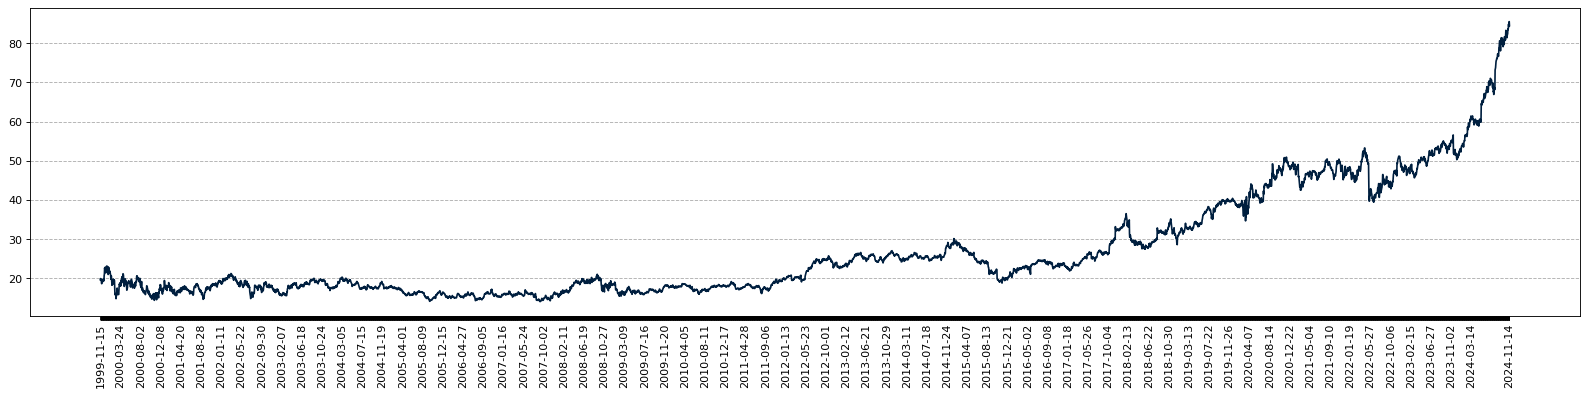

In [6]:
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(dates, data['Walmart'], color=config["plots"]["color_actual"])
xticks = [dates[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
# plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid(which='major', axis='y', linestyle='--')
plt.show()

# Preprocessing Data

In [7]:
normalizer = Normalizer()
scalers = Scaler()
data_preprocess = DataPreprocess()
# timeseries = TimeSeriesDataset()
modeldata = ModelData()

In [8]:
data_normalized = normalizer.fit_transform(data['Walmart'].reshape(-1, 1)).flatten()
scaler = scalers.scalers()['Walmart']
data_scaled = scaler.fit_transform(data['Walmart'].reshape(-1, 1)).flatten()

In [9]:
print(data_normalized)
print('--------------------------------------------------------------------------------------')
print(data_scaled)
print('--------------------------------------------------------------------------------------')
for i in range(len(data_scaled)):
    if data_normalized[i] != data_scaled[i]:
        print('Error')

[-0.53897252 -0.51561654 -0.54052949 ...  4.34479494  4.38291206
  4.30593083]
--------------------------------------------------------------------------------------
[-0.53897252 -0.51561654 -0.54052949 ...  4.34479494  4.38291206
  4.30593083]
--------------------------------------------------------------------------------------


In [10]:
X_unseen, X_train,  X_test, y_train, y_test = data_preprocess.split_data()

In [11]:
train_data, test_data = modeldata.model_data()

In [12]:
print(train_data['Walmart'].x.shape)
print(train_data['Walmart'].y.shape)
print(test_data['Walmart'].x.shape)
print(test_data['Walmart'].y.shape)

(5016, 20, 1)
(5016,)
(1255, 20, 1)
(1255,)


# Model Building & Training

In [13]:
m = Models(config,stocks)
mod = m.models()['Walmart']
d = Data(config, stocks)
t = Trainer(config, stocks, mod)
t_all = TrainerAll(config, stocks)


In [14]:
m.config

{'data': {'window_size': 20, 'train_split_size': 0.8},
 'model': {'input_size': 1,
  'num_lstm_layers': 2,
  'lstm_size': 32,
  'dropout': 0.2},
 'training': {'device': 'cpu',
  'batch_size': 64,
  'num_epoch': 100,
  'learning_rate': 0.01,
  'scheduler_step_size': 40},
 'plots': {'show_plots': True,
  'xticks_interval': 90,
  'color_actual': '#001f3f',
  'color_train': '#3D9970',
  'color_val': '#0074D9',
  'color_pred_train': '#3D9970',
  'color_pred_val': '#0074D9',
  'color_pred_test': '#FF4136'}}

In [14]:
mod

LSTMModel(
  (linear_1): Linear(in_features=1, out_features=32, bias=True)
  (relu): ReLU()
  (lstm): LSTM(32, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_2): Linear(in_features=64, out_features=1, bias=True)
)

In [15]:
train_loader, test_loader = d.dataloaders()

In [16]:
print(train_loader['Walmart'].dataset.x.shape)
print(train_loader['Walmart'].dataset.y.shape)
print(test_loader['Walmart'].dataset.x.shape)
print(test_loader['Walmart'].dataset.y.shape)

(5016, 20, 1)
(5016,)
(1255, 20, 1)
(1255,)


In [17]:
# t_all.train_all()

In [18]:
t.train(train_loader['Walmart'], test_loader['Walmart'])

Epoch[1/100] | loss train:0.025839, test:0.232094 | lr:0.010000
Epoch[2/100] | loss train:0.004796, test:0.215230 | lr:0.010000
Epoch[3/100] | loss train:0.003924, test:0.165358 | lr:0.010000
Epoch[4/100] | loss train:0.003005, test:0.180563 | lr:0.010000
Epoch[5/100] | loss train:0.003064, test:0.181647 | lr:0.010000
Epoch[6/100] | loss train:0.002737, test:0.172984 | lr:0.010000
Epoch[7/100] | loss train:0.002691, test:0.115211 | lr:0.010000
Epoch[8/100] | loss train:0.002652, test:0.139698 | lr:0.010000
Epoch[9/100] | loss train:0.002440, test:0.124756 | lr:0.010000
Epoch[10/100] | loss train:0.002183, test:0.155409 | lr:0.010000
Epoch[11/100] | loss train:0.002347, test:0.124216 | lr:0.010000
Epoch[12/100] | loss train:0.002238, test:0.087487 | lr:0.010000
Epoch[13/100] | loss train:0.002431, test:0.125605 | lr:0.010000
Epoch[14/100] | loss train:0.001900, test:0.124564 | lr:0.010000
Epoch[15/100] | loss train:0.002252, test:0.132014 | lr:0.010000
Epoch[16/100] | loss train:0.00269

In [ ]:
utils_data_prep = DataPrep()
_,_,_,_,_ = utils_data_prep.prepare_data(data_normalized, config)
split_index = utils_data_prep.split_index


# Model Evaluation

In [20]:
from torch.utils.data import DataLoader

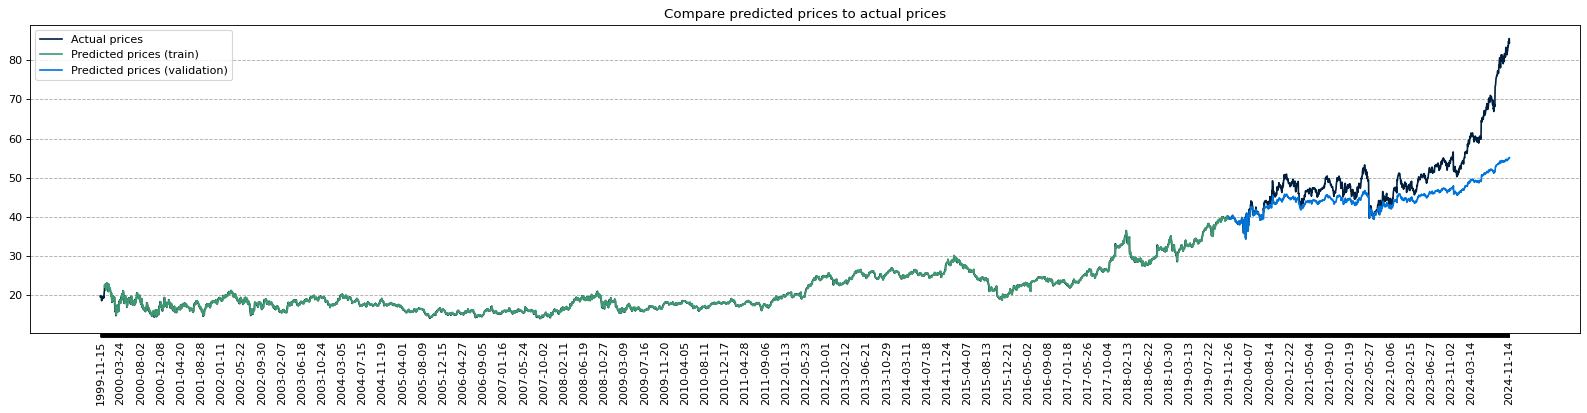

In [21]:
# here we re-initialize dataloader so the data doesn't shuffled, so we can plot the values by date

train_dataloader = DataLoader(train_data['Walmart'], batch_size=config["training"]["batch_size"], shuffle=False)
val_dataloader = DataLoader(test_data['Walmart'], batch_size=config["training"]["batch_size"], shuffle=False)

mod.eval()

# predict on the training data, to see how well the model managed to learn and memorize

predicted_train = np.array([])

for idx, (x, y) in enumerate(train_dataloader):
    x = x.to(config["training"]["device"])
    out = mod(x)
    out = out.cpu().detach().numpy()
    predicted_train = np.concatenate((predicted_train, out))

# predict on the validation data, to see how the model does

predicted_val = np.array([])

for idx, (x, y) in enumerate(val_dataloader):
    x = x.to(config["training"]["device"])
    out = mod(x)
    out = out.cpu().detach().numpy()
    predicted_val = np.concatenate((predicted_val, out))

if config["plots"]["show_plots"]:

    # prepare data for plotting, show predicted prices

    to_plot_data_y_train_pred = np.zeros(num_data_points)
    to_plot_data_y_val_pred = np.zeros(num_data_points)

    to_plot_data_y_train_pred[config["data"]["window_size"]:split_index+config["data"]["window_size"]] = scaler.inverse_transform(predicted_train)
    to_plot_data_y_val_pred[split_index+config["data"]["window_size"]:] = scaler.inverse_transform(predicted_val)

    to_plot_data_y_train_pred = np.where(to_plot_data_y_train_pred == 0, None, to_plot_data_y_train_pred)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)

    # plots

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(dates, data['Walmart'], label="Actual prices", color=config["plots"]["color_actual"])
    plt.plot(dates, to_plot_data_y_train_pred, label="Predicted prices (train)", color=config["plots"]["color_pred_train"])
    plt.plot(dates, to_plot_data_y_val_pred, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    plt.title("Compare predicted prices to actual prices")
    xticks = [dates[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
    x = np.arange(0,len(xticks))
    plt.xticks(x, xticks, rotation='vertical')
    plt.grid(which='major', axis='y', linestyle='--')
    plt.legend()
    plt.show()

    # prepare data for plotting, zoom in validation

    to_plot_data_y_val_subset = scaler.inverse_transform(y_test['Walmart'][0])
    to_plot_predicted_val = scaler.inverse_transform(predicted_val)
    to_plot_data_date = dates[split_index+config["data"]["window_size"]:]

    # plots

    # fig = figure(figsize=(25, 5), dpi=80)
    # fig.patch.set_facecolor((1.0, 1.0, 1.0))
    # plt.plot(to_plot_data_date, to_plot_data_y_val_subset, label="Actual prices", color=config["plots"]["color_actual"])
    # plt.plot(to_plot_data_date, to_plot_predicted_val, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    # plt.title("Zoom in to examine predicted price on validation data portion")
    # xticks = [to_plot_data_date[i] if ((i%int(config["plots"]["xticks_interval"]/5)==0 and (len(to_plot_data_date)-i) > config["plots"]["xticks_interval"]/6) or i==len(to_plot_data_date)-1) else None for i in range(len(to_plot_data_date))] # make x ticks nice
    # xs = np.arange(0,len(xticks))
    # plt.xticks(xs, xticks, rotation='vertical')
    # plt.grid(which='major', axis='y', linestyle='--')
    # plt.legend()
    # plt.show()

# Model Prediction

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [23]:
type(dates[0])

str

/var/folders/d1/zn9nwmz172n413l8pt90v7yw0000gn/T/ipykernel_60630/1486864298.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  to_plot_data_y_test_pred[plot_range-1] = prediction


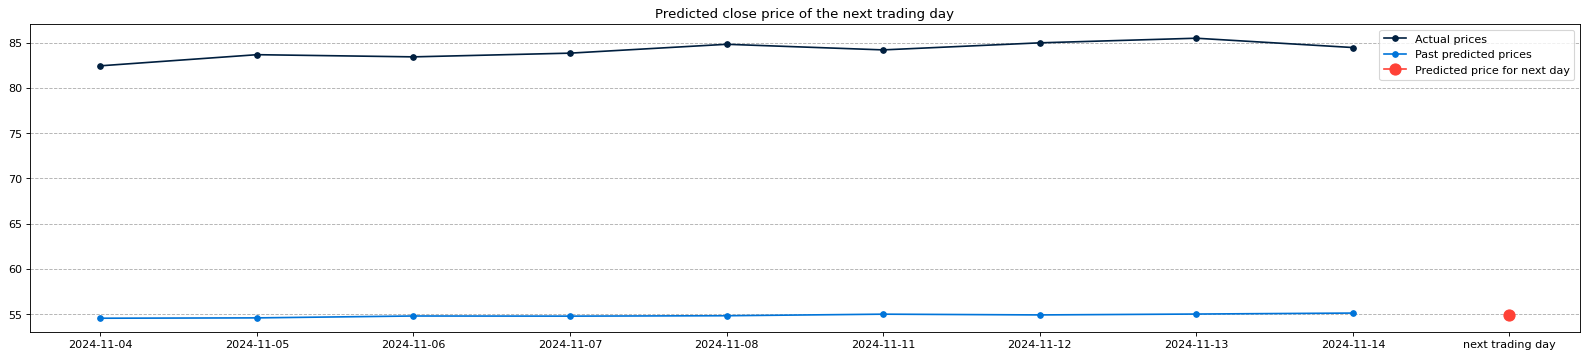

Predicted close price of the next trading day: 54.95


In [24]:
# predict on the unseen data, tomorrow's price 

mod.eval()

x = torch.tensor(X_unseen['Walmart']).float().to(config["training"]["device"]).unsqueeze(0).unsqueeze(2) # this is the data type and shape required, [batch, sequence, feature]
prediction = mod(x)
prediction = prediction.cpu().detach().numpy()
prediction = scaler.inverse_transform(prediction)[0]

if config["plots"]["show_plots"]:
        
    # prepare plots

    plot_range = 10
    to_plot_data_y_val = np.zeros(plot_range)
    to_plot_data_y_val_pred = np.zeros(plot_range)
    to_plot_data_y_test_pred = np.zeros(plot_range)

    to_plot_data_y_val[:plot_range-1] = scaler.inverse_transform(y_test['Walmart']).flatten()[-plot_range+1:]
    to_plot_data_y_val_pred[:plot_range-1] = scaler.inverse_transform(predicted_val).flatten()[-plot_range+1:]

    to_plot_data_y_test_pred[plot_range-1] = prediction

    to_plot_data_y_val = np.where(to_plot_data_y_val == 0, None, to_plot_data_y_val)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)
    to_plot_data_y_test_pred = np.where(to_plot_data_y_test_pred == 0, None, to_plot_data_y_test_pred)

    # plot

    plot_date_test = list(dates[-plot_range+1:])
    plot_date_test.append("next trading day")

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(plot_date_test, to_plot_data_y_val, label="Actual prices", marker=".", markersize=10, color=config["plots"]["color_actual"])
    plt.plot(plot_date_test, to_plot_data_y_val_pred, label="Past predicted prices", marker=".", markersize=10, color=config["plots"]["color_pred_val"])
    plt.plot(plot_date_test, to_plot_data_y_test_pred, label="Predicted price for next day", marker=".", markersize=20, color=config["plots"]["color_pred_test"])
    plt.title("Predicted close price of the next trading day")
    plt.grid(which='major', axis='y', linestyle='--')
    plt.legend()
    plt.show()

print("Predicted close price of the next trading day:", round(prediction[0], 2))




In [25]:
prediction

array([54.95452746])

In [26]:
data['Walmart'][-9:]

array([82.44999695, 83.68000031, 83.44000244, 83.84999847, 84.83000183,
       84.20999908, 84.98999786, 85.5       , 84.47000122])

In [27]:
to_plot_data_y_val

array([82.44999694824219, 83.68000030517578, 83.44000244140625,
       83.8499984741211, 84.83000183105469, 84.20999908447266,
       84.98999786376953, 85.5, 84.47000122070312, None], dtype=object)

In [28]:
scaler.inverse_transform(y_test['Walmart']).flatten()[-10:]

array([82.19000244, 82.44999695, 83.68000031, 83.44000244, 83.84999847,
       84.83000183, 84.20999908, 84.98999786, 85.5       , 84.47000122])

In [29]:
y_test['Walmart'].shape

(1255,)

In [30]:
scaler.inverse_transform(predicted_val).flatten()[-10:]

array([54.48704437, 54.54822237, 54.58642273, 54.79426778, 54.77984894,
       54.82303847, 54.99534044, 54.91299354, 55.00980394, 55.11753693])